# Análisis y conclusiones obtenidas del estudio.

In [220]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely import wkb
from shapely.geometry import Polygon, Point, MultiPolygon, LineString

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

Utilizaremos los ficheros gold obtenido para sacar conclusiones sobre la distribución de servicios en los diferentes distritos de la ciudad de València.

In [221]:
centros = pd.read_parquet("gold_centros_poblacion_distritos.parquet")
viviendas = pd.read_parquet("gold_viviendas_vpp_poblacion_distritos.parquet")
colegios = pd.read_parquet("gold_colegios_poblacion_distritos.parquet")
hospitales = pd.read_parquet("gold_hospitales_poblacion_distritos.parquet")

## Graficaremos cada análisis para poder realizar una comparación directa

Crearemos métodos generales para reducir la complejidad de la libreta. Los datos han sido calculados en los gold.py y almacenados en sus respectivos parquet.    
Por su lado, los mapas interactivos se almacenan en la carpeta gold como .html

In [222]:
def graficar_barras(df, columna_valor, titulo, xlabel="Distrito", ylabel="Cantidad"):
    df_plot = df.groupby("nombre")[columna_valor].mean().sort_values(ascending=False)
    sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [237]:
def graficar_barras_norm(df, columna_valor, titulo, xlabel="Distrito", ylabel="Cantidad por 1000 hab"):
    # Agrupar una sola vez y calcular ambas columnas
    df_grouped = df.groupby("nombre").agg({
        columna_valor: 'mean',
        'Poblacion_2024': 'mean'
    })
    
    # Calcular la métrica normalizada
    df_grouped['valor_norm'] = (df_grouped[columna_valor] / df_grouped['Poblacion_2024']) * 1000
    
    # Ordenar y graficar
    df_plot = df_grouped['valor_norm'].sort_values(ascending=False)
    
    sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")
    plt.xticks(rotation=90)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout() 
    plt.show()

In [223]:
def plot_geodata(df, columna_valor, titulo, cmap="OrRd"):
# Función interna para asegurar que sea geometría Shapely
    def ensure_geometry(geom):
        if geom is None:
            return None
        if isinstance(geom, (Polygon, Point, MultiPolygon, LineString)):
            return geom
        # Si no es Shapely, asumimos que es WKB
        return wkb.loads(geom)

    df['geometry'] = df['geometry'].apply(ensure_geometry)

    # Crear GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    # Graficar
    gdf.plot(column=columna_valor, cmap=cmap, legend=True, figsize=(10,10))
    plt.title(titulo)
    plt.show()

#### Centros sociales

C:\Users\jesus\AppData\Local\Temp\ipykernel_17300\3551067167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")


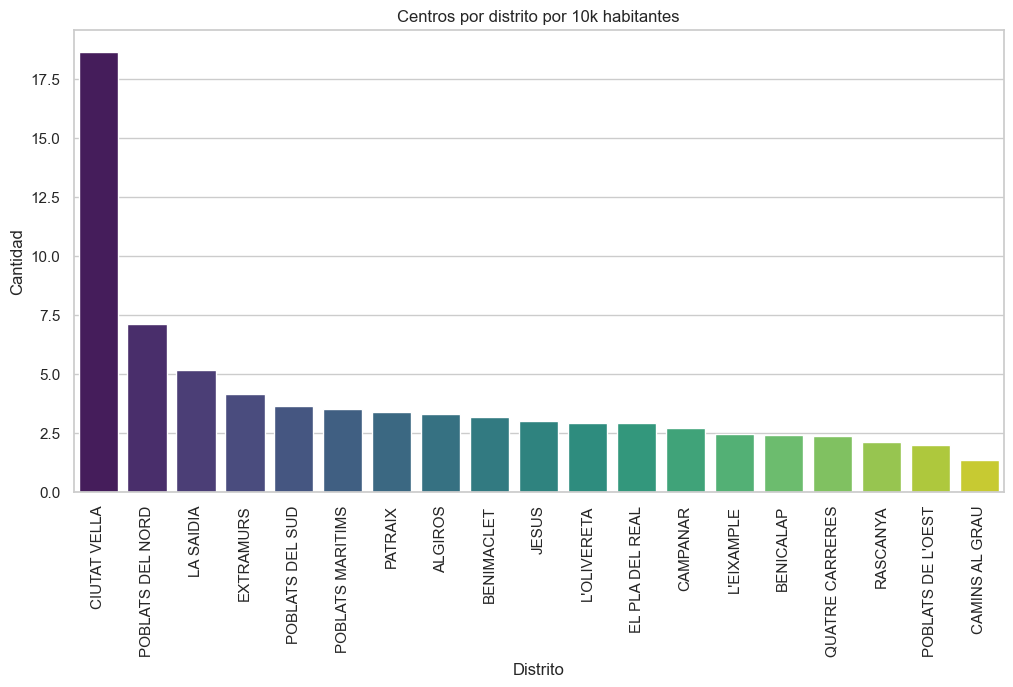

In [224]:
graficar_barras(centros, "centros_por_10k", "Centros por distrito por 10k habitantes")

En este caso podemos ver cómo Ciutat Vella destaca por encima del resto de distritos en cuanto a centros sociales se refiere. El resto de distritos siguen una línea muy similar, pero cabe reseñar Poblats Del Nord puesto que, al estar formado por diferentes zonas aisladas, los recursos se dividen en relación a estas áreas y no en relación a la población.

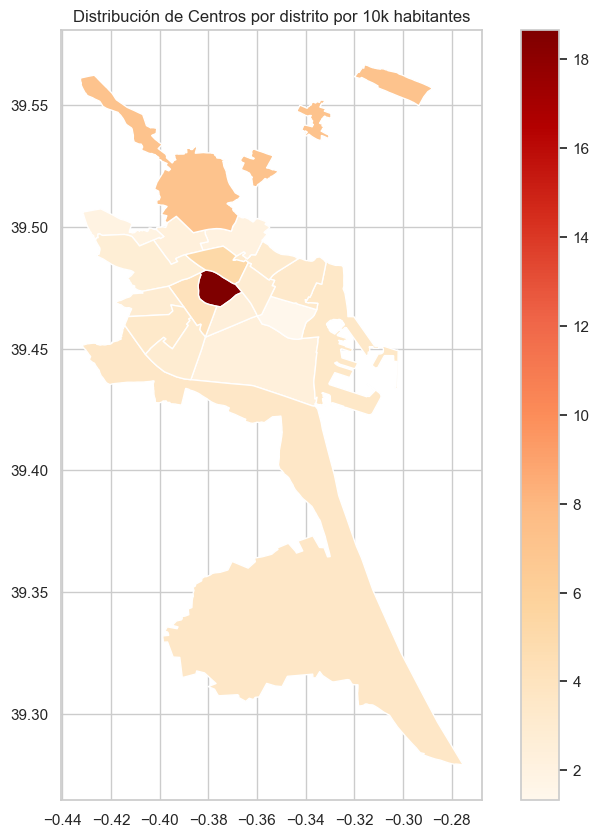

In [225]:
plot_geodata(centros, "centros_por_10k", "Distribución de Centros por distrito por 10k habitantes")

#### Viviendas de protección pública

C:\Users\jesus\AppData\Local\Temp\ipykernel_17300\3551067167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")


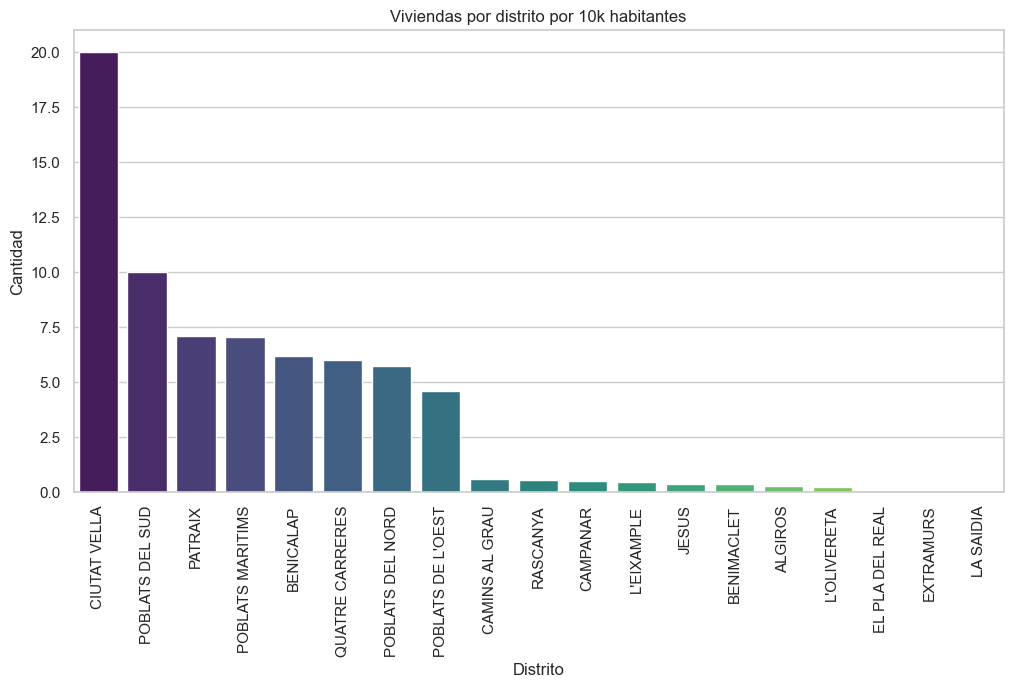

In [226]:
graficar_barras(viviendas, "viviendas_por_10k", "Viviendas por distrito por 10k habitantes")

El reparto de viviendas de protección pública vemos como contiene un patrón muy desigual. Extraemos como conlusión en este caso que una vez más es Ciutat Vella el distrito que más beneficiado se ve por el reparto de este bien. Además, encontramos otros distritos como El Pla Del Real, Extramurs o La Saidia donde no existen viviendas de protección pública.

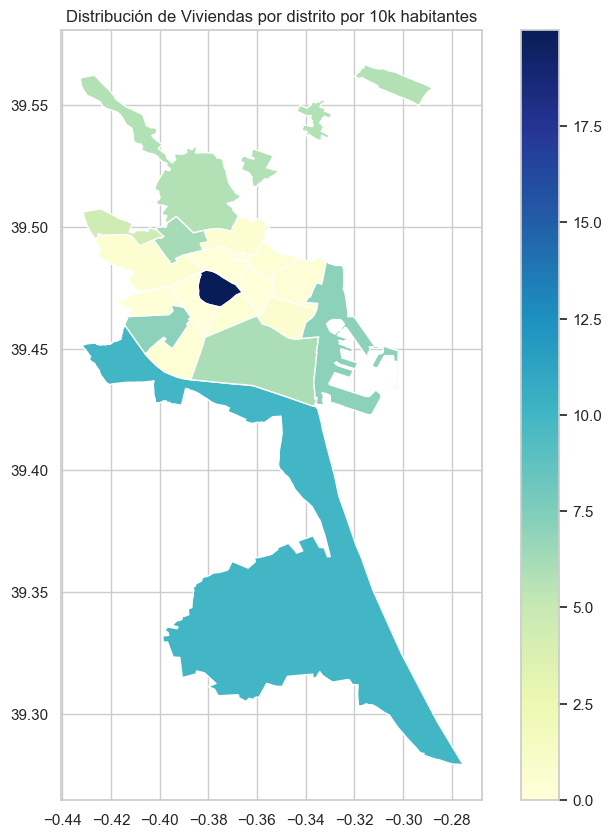

In [227]:
plot_geodata(viviendas, "viviendas_por_10k", "Distribución de Viviendas por distrito por 10k habitantes", cmap="YlGnBu")

#### Colegios

C:\Users\jesus\AppData\Local\Temp\ipykernel_17300\3551067167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")


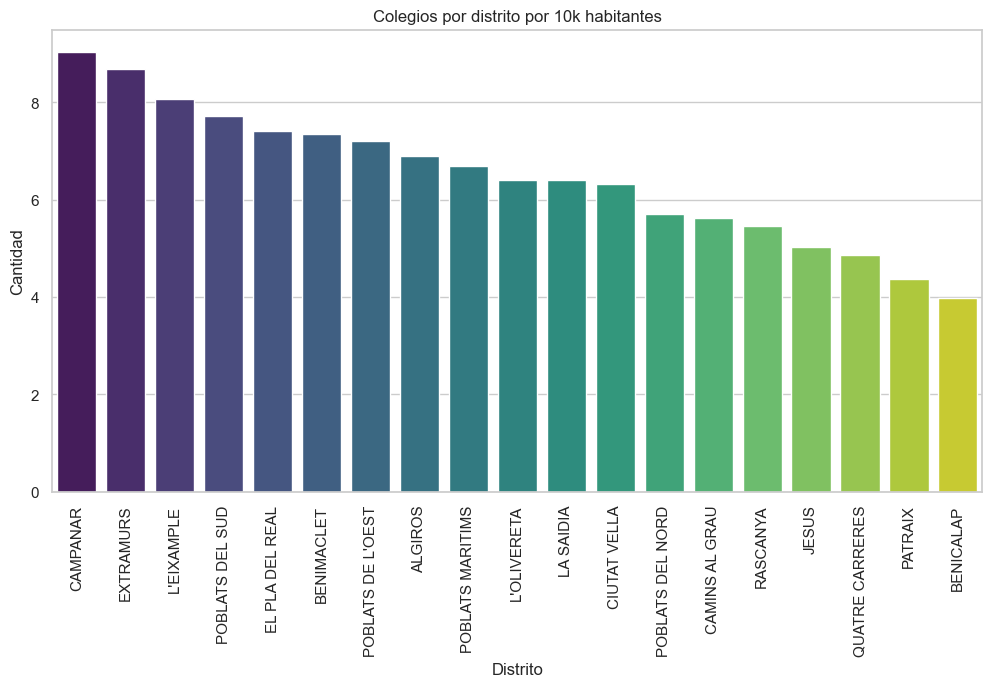

In [228]:
graficar_barras(colegios, "colegios_por_10k", "Colegios por distrito por 10k habitantes")

Respecto a la distribución de centros educativos, en este caso podemos ver una línea general bastante estable para los distritos de València. En el mapa interactivo es posible ver la distribución de estos colegios en términos de su régimen (público, privado, etc...).

C:\Users\jesus\AppData\Local\Temp\ipykernel_17300\1940052088.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")


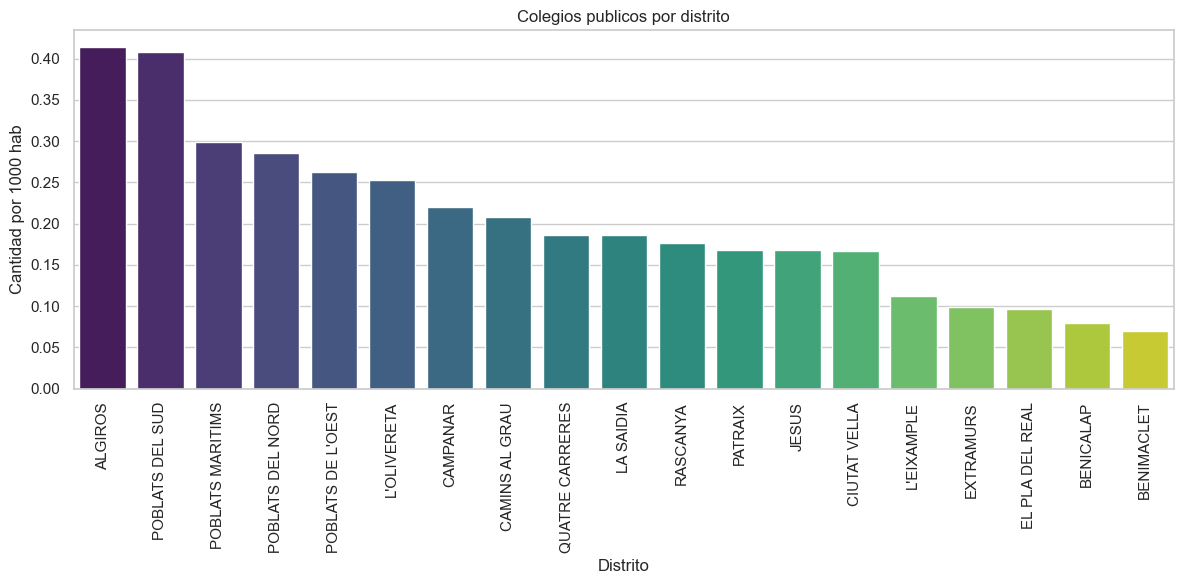

In [238]:
graficar_barras_norm(colegios, "num_publicos", "Colegios publicos por distrito")

En este caso podemos ver cómo en términos de colegios públicos por cada 10k habitantes Campanar no destaca. Esto puede deberse tanto a su mayor población (de ahí su mayor n´mero de centros educativos) como a una mayor concentración de colegios concertados o privados.

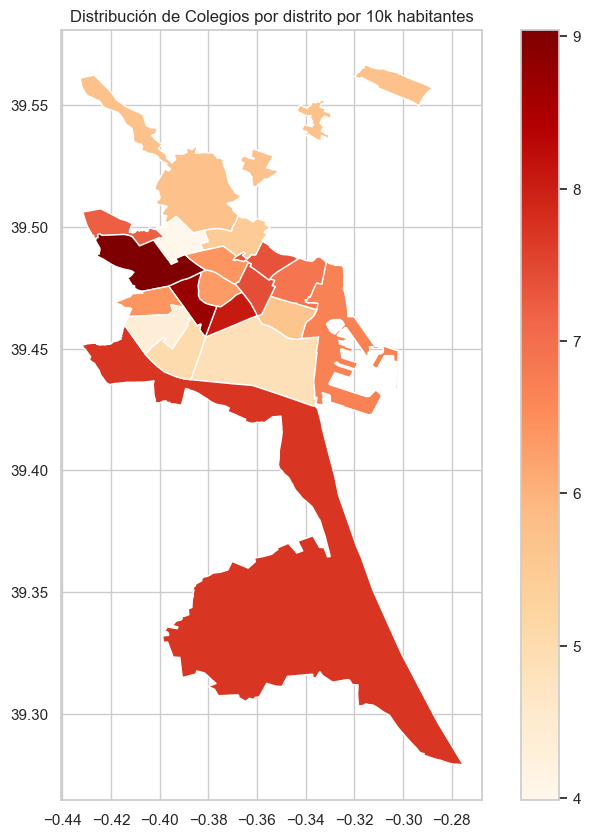

In [229]:
plot_geodata(colegios, "colegios_por_10k", "Distribución de Colegios por distrito por 10k habitantes", cmap="OrRd")

#### Hospitales

C:\Users\jesus\AppData\Local\Temp\ipykernel_17300\3551067167.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_plot.index, y=df_plot.values, palette="viridis")


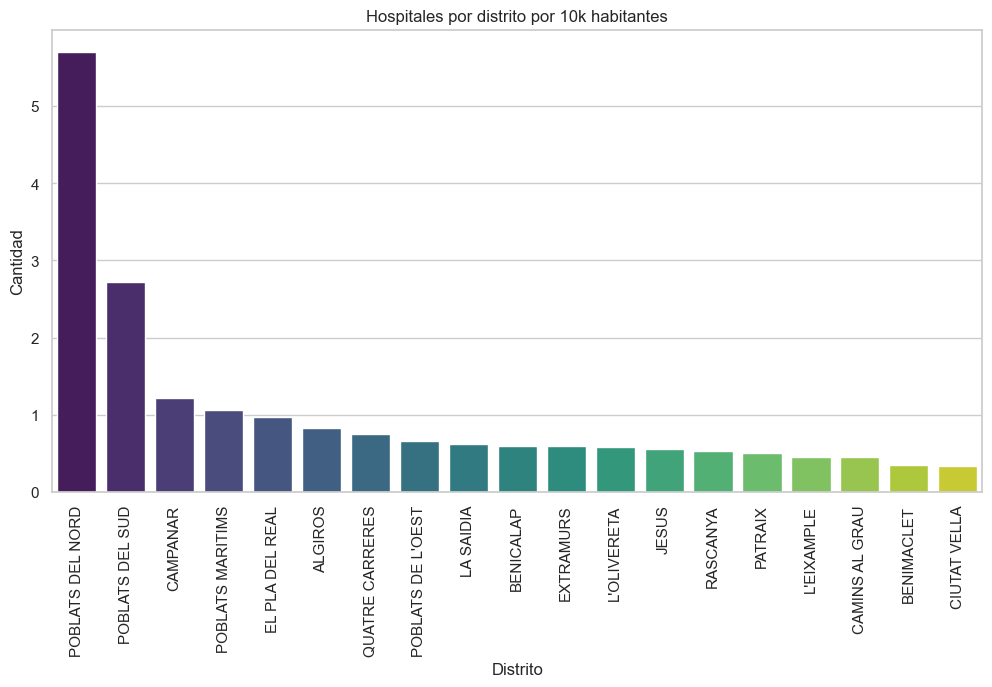

In [239]:
graficar_barras(hospitales, "hospitales_por_10k", "Hospitales por distrito por 10k habitantes")

Respeto a centros de salud, es reseñable el valor de Poblats del Nord debido a que al cubrir una superficie más desconectada y estar formada por diferentes zonas geográficas aisladas, los centros de salud deben distribuirse en estas zonas para asegurar la cercanía de sus ciudadanos. Esto explica por qué en el distrito menos poblado encontramos esta concentración reseñable de centros de salud. Ocurre lo mismo de una manera más leve con los Poblats Del Sud.

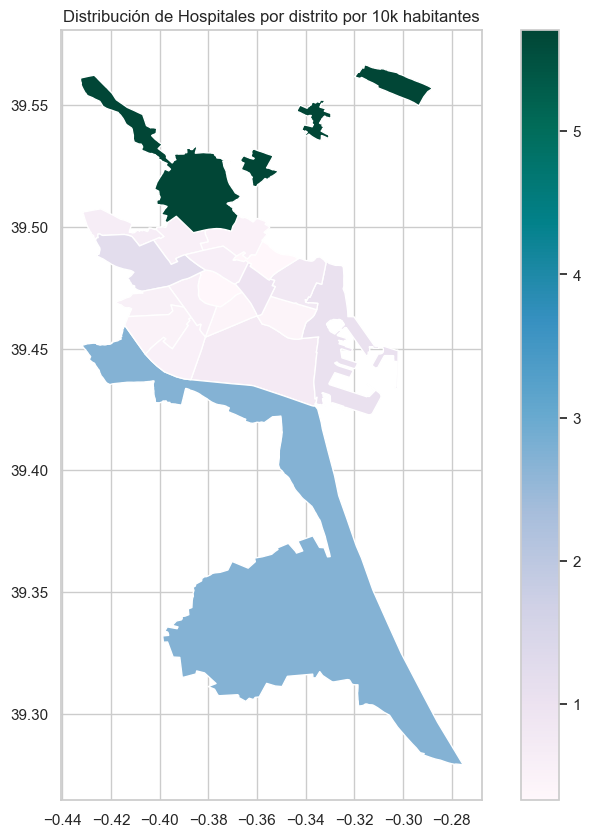

In [231]:
plot_geodata(hospitales, "hospitales_por_10k", "Distribución de Hospitales por distrito por 10k habitantes", cmap="PuBuGn")

## Comparativa general

In [232]:
# En lugar de extraer solo una columna, selecciona las que necesitas
centros_norm = centros[["nombre", "centros_por_10k"]].copy()
viviendas_norm = viviendas[["nombre", "viviendas_por_10k"]].copy()
colegios_norm = colegios[["nombre", "colegios_por_10k"]].copy()
hospitales_norm = hospitales[["nombre", "hospitales_por_10k"]].copy()

# Agrupar por distrito y calcular promedio
centros_agg = centros_norm.groupby("nombre", as_index=False)["centros_por_10k"].mean()
viviendas_agg = viviendas_norm.groupby("nombre", as_index=False)["viviendas_por_10k"].mean()
colegios_agg = colegios_norm.groupby("nombre", as_index=False)["colegios_por_10k"].mean()
hospitales_agg = hospitales_norm.groupby("nombre", as_index=False)["hospitales_por_10k"].mean()

# Renombrar columnas
centros_agg = centros_agg.rename(columns={"centros_por_10k": "Centros (10k hab)"})
viviendas_agg = viviendas_agg.rename(columns={"viviendas_por_10k": "Viviendas (10k hab)"})
colegios_agg = colegios_agg.rename(columns={"colegios_por_10k": "Colegios (10k hab)"})
hospitales_agg = hospitales_agg.rename(columns={"hospitales_por_10k": "Hospitales (10k hab)"})

# Merge
from functools import reduce
dfs = [centros_agg, viviendas_agg, colegios_agg, hospitales_agg]
df_conjunto = reduce(lambda left, right: pd.merge(left, right, on="nombre", how="outer"), dfs)

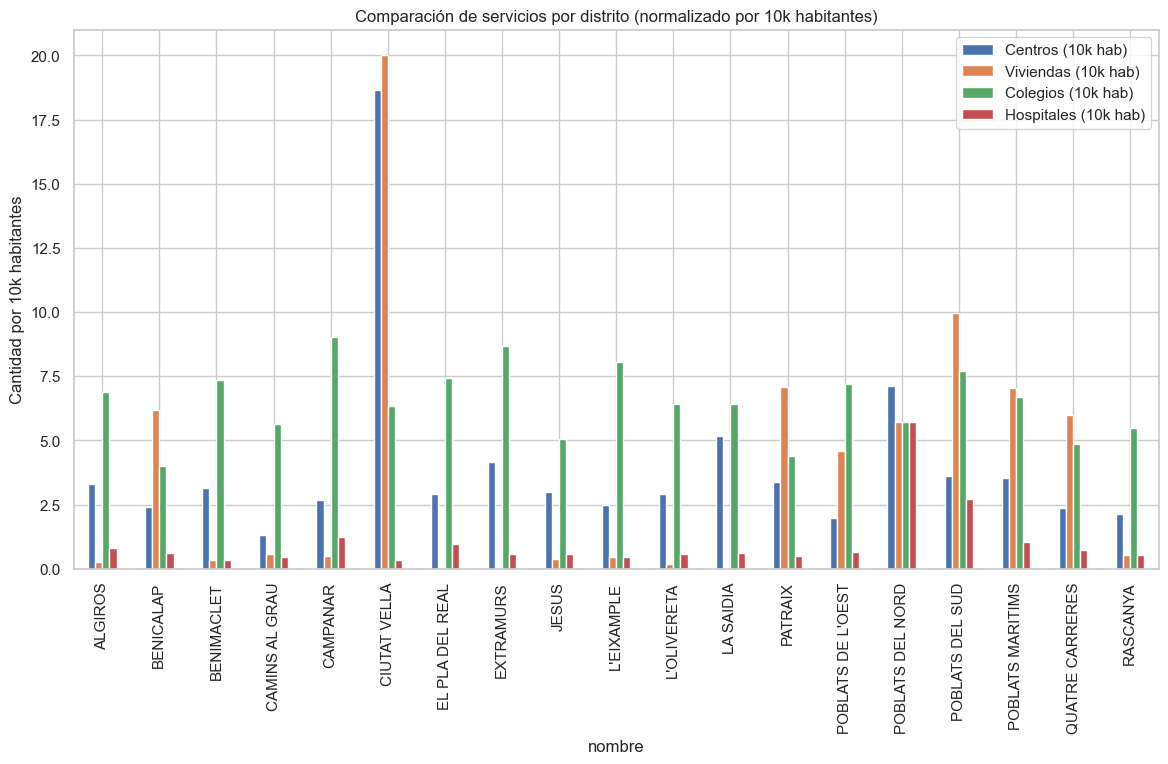

In [233]:
df_plot = df_conjunto.set_index("nombre")
df_plot.plot(kind="bar", figsize=(14,7))
plt.title("Comparación de servicios por distrito (normalizado por 10k habitantes)")
plt.ylabel("Cantidad por 10k habitantes")
plt.xticks(rotation=90)
plt.show()

Al realizar una comparativa general, destacan dos aspectos relevantes:

* La distribución de recursos en el distrito de Ciutat Vella. Esto probablemente se deba a su papel como centro neurálgico de la ciudad, donde muchos recursos no solo atienden a la población local, sino que funcionan también como recursos generales para toda la ciudad. En cambio, en los distritos periféricos, los recursos cumplen principalmente el papel de servicio para la población del propio distrito.

* La distribución de servicios en Poblats del Nord refleja la necesidad de garantizar ciertos servicios localizados en las zonas más alejadas de la urbe. Aquí los recursos se distribuyen de manera controlada, probablemente para cumplir con los mínimos requeridos por distrito y población. En este sentido, la administración concibe estos recursos como una forma de dotar a estas áreas de servicios generales, más que como en los distritos más poblados, donde los recursos deben ajustarse al número de habitantes de cada zona.